<a href="https://colab.research.google.com/github/vld16018/Assignment1/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import model_from_json

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/AI/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from zipfile import ZipFile
file_name = root_path + "/Dataset.zip"
#file_name = "Image_2.zip"
with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print ("Done")
#!rm -rf "Dataset.zip"

Done


4 categories from 4 classes of train dataset as seen after folder extraction
The train categories will be used for traing and validation with 80% for training  and  20% for validation

Creating a datagen class to convert them into train and test 
Normalise the data
By default the image gets converted to 254*254 from 800*800
As its  a black and white image using gray scale for analysing the data
3 channel only required if data is present in them 

Found 440 images belonging to 4 classes.
Found 30 images belonging to 4 classes.
Batches train=88, test=30
Batch shape=(5, 256, 256, 1), mean=0.605 min=0.000, max=1.000
Batch shape=(5, 4), mean=0.605 min=0.000, max=1.000
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
(256, 256, 1)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


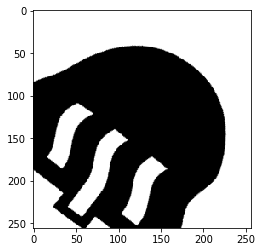

In [0]:
# create a data generator
datagen = ImageDataGenerator(rescale=1.0/255.0,featurewise_center=True, featurewise_std_normalization=True,rotation_range=90,width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)
#Cannot do fit for dataset
train_set = datagen.flow_from_directory('Dataset/train/', class_mode='categorical', color_mode = "grayscale",batch_size=5)

# load and iterate validation dataset
#test_set = datagen.flow_from_directory('Dataset/test/',target_size=(200, 200),class_mode='categorical', color_mode = "grayscale",batch_size=1)
test_set = datagen.flow_from_directory('Dataset/test/',class_mode='categorical', color_mode = "grayscale",batch_size=1)


print('Batches train=%d, test=%d' % (len(train_set), len(test_set)))
# confirm the scaling works
batchX, batchy = train_set.next()
print('Batch shape=%s, mean=%.3f min=%.3f, max=%.3f' % (batchX.shape, batchX.mean(),batchX.min(), batchX.max()))
print('Batch shape=%s, mean=%.3f min=%.3f, max=%.3f' % (batchy.shape, batchX.mean(),batchX.min(), batchX.max()))
print (batchy)
image = batchX[4,:,:,:]
print(image.shape)
a = np.expand_dims(image, axis=0)  # or axis=1
plt.imshow(image[:,:,0],cmap = 'gray')
plt.show()
#plt.imshow(batchX[0,:,:,:],cmap='gray')

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Validation accuracy received is 0.8211 for the previous model for 100 epoch's


1.   Model sequential with bottleneck layer after 3 conv layers and then max pooling is applied
2.   Batch Norm & Dropout for regularisation 
3.   Adding l2 regularisation, tuned different values for max accuarcy  
4.   Adding dropout increases to 0.7575 with 0.01  for 40 epoch
5   Making architectural changes to existing architecture gives 86% to 90% in  20 epoch's
6.  Architectural changes are with respect to receptive field. Each conv layer comment   contains layer output and receptive field calculation
7.   Using 3*3 for reducing parameters in convolution layer
8.   Getting an accuracy of 20% for SGD then shiifted to Adam
9.  Cross_entropy was giving the above mentioned accuracy but when added bacth norm i the last layer it increased it to 86%. 





In [0]:

# Define the model
model = Sequential()

model.add(Convolution2D(64, 3, 3,activation='relu',input_shape=(256, 256, 1),kernel_regularizer=regularizers.l2(0.0001))) #256,3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #254 #5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(256, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #252 #7
model.add(BatchNormalization())
model.add(Dropout(0.1))
#7

model.add(MaxPooling2D(pool_size=(2, 2)))  #126 #14
model.add(Dropout(0.1))

#126 #14
model.add(Convolution2D(32, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #124 #16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #122 #18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #120 #20
model.add(BatchNormalization())
model.add(Dropout(0.1)) #20

model.add(MaxPooling2D(pool_size=(2, 2)))#60 #40 actually ask regarding these #200
model.add(Dropout(0.1))

#200 40
model.add(Convolution2D(32, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #58 #42
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #56 #44
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #54 #46
model.add(BatchNormalization())
model.add(Dropout(0.1)) #42

model.add(MaxPooling2D(pool_size=(2, 2)))#27 #92 actually ask regarding these 100
model.add(Dropout(0.1))


model.add(Convolution2D(64, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #25 #94
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #23 #96
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #21 #98
model.add(BatchNormalization()) #98
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11 #196 actually ask regarding these 50
model.add(Dropout(0.1))

model.add(Convolution2D(4, 10,10,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #4 #206
model.add(BatchNormalization())
#model.add(Dropout(0.1))
# Compile model

model.add(Flatten())
model.add(Activation('softmax'))
epochs = 10
learning_rate = 0.09
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(256, 256,..., kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dis

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 254, 254, 64)      640       
_________________________________________________________________
batch_normalization_158 (Bat (None, 254, 254, 64)      256       
_________________________________________________________________
dropout_210 (Dropout)        (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 252, 252, 128)     73856     
_________________________________________________________________
batch_normalization_159 (Bat (None, 252, 252, 128)     512       
_________________________________________________________________
dropout_211 (Dropout)        (None, 252, 252, 128)     0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 250, 250, 256)     295168    
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.0001 * 1/(1 + 0.319 * epoch), 10)

#datagen = ImageDataGenerator(zoom_range=0.0, 
                            # horizontal_flip=False)


# train the model
start = time.time()
# Train the model
#model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100,validation_data=(X_test_iterator),validation_steps=len(X_test_iterator),
#                                  verbose=1)

#model_info = model.fit_generator(X_train_iterator, steps_per_epoch=len(X_train_iterator), epochs=80, verbose=1, validation_data=(X_test_iterator),validation_steps=len(X_test_iterator),callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#model_info = model.fit_generator(train_set, steps_per_epoch=88, epochs=10, verbose=1, validation_data=(test_set),validation_steps=30,callbacks=[LearningRateScheduler(scheduler, verbose=1)])
model_info = model.fit_generator(train_set, steps_per_epoch=70, epochs=20, verbose=1, validation_data=(train_set),validation_steps=18,callbacks=[LearningRateScheduler(scheduler, verbose=1)])

#model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))
# plot model history
#plot_model_history(model_info)
# compute test accuracy


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0001.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


70/70 [==============================] - 23s 322ms/step - loss: 0.5377 - acc: 0.8686 - val_loss: 0.6819 - val_acc: 0.8000
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 7.5815e-05.
70/70 [==============================] - 23s 323ms/step - loss: 0.5579 - acc: 0.8571 - val_loss: 0.6266 - val_acc: 0.8889
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 6.10501e-05.
70/70 [==============================] - 22s 321ms/step - loss: 0.5939 - acc: 0.8200 - val_loss: 0.7352 - val_acc: 0.8444
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 5.10986e-05.
70/70 [==============================] - 22s 320ms/step - loss: 0.5271 - acc: 0.8629 - val_loss: 0.5780 - val_acc: 0.9222
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 4.39367e-05.
70/70 [==============================] - 22s 319ms/step - loss: 0.5861 - acc: 0.8257 - val_loss: 0.6950 - val_acc: 0.8556
Epoch 6/20

Epoch 00006: LearningRateScheduler sett

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))